In [1]:
# the data that we work with
# Statisitical -> Exploratory Data Analysis

import numpy as np
import matplotlib.pyplot as plt

In [3]:

p1 = [200,200]
p2 = [200, 0]
p3 = [0, 200]
p4 = [0,0]
# 2X 1 -> 1 row of image
# 2 such rows can then form a square image

i1 = np.array([np.array(p1), np.array(p4)])
i2 = np.array([np.array(p2), np.array(p2)])
i3 = np.array([np.array(p2), np.array(p3)])


# 0-> 1 type of color
# Non-zero value-> 2nd type of color

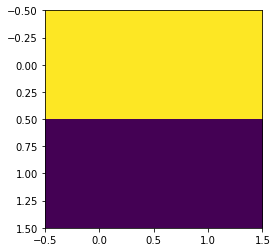

In [4]:
plt.figure() #200-> yellow, 0-> purple
plt.imshow(i1) # horizontal

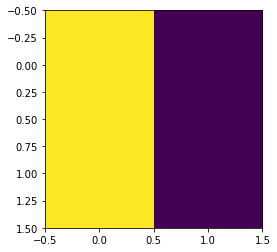

In [5]:
plt.imshow(i2) # vertical line

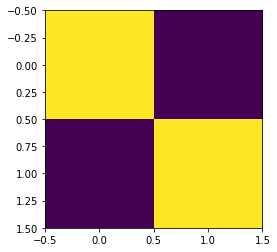

In [6]:
plt.imshow(i3) # diagonal

In [7]:
# Edge Detection-> expected pixels X very_large_and_very_small_numbers
# very large numbers-> for px we want to detect
# very small negative numbers-> for px we want to drop

# prominent pixels get larger
# unwanted pixels become negative

# we pass images through filters that allow only positive numbers!

In [8]:
kernel_h = np.array([np.array([2,2]), np.array([-2,-2])]) # if pixels are at desired position, the dot product= 800
kernel_v = np.array([np.array([2,-2]), np.array([2,-2])])
kernel_d = np.array([np.array([2,-2]), np.array([-2,2])])


In [13]:
def applyFilter(img, kernel):
    # dot product
    result = np.multiply(img, kernel)
    dot_prod = np.sum(result)
    return dot_prod

In [18]:


kernels = [kernel_h,kernel_v,kernel_d]
images = [i1,i2,i3]
printstates = ['horizontal', 'vertical', 'diagonal']
isKernelFound = lambda val,c: (printstates[c]+' detected') if val==800 else ' not detected'

In [19]:
# apply filters to the images
for count , img in enumerate(images):
    print('Image number :' + str(count+1))
    for c2, k in enumerate(kernels):
        print('kernel number = ' + str(c2+1))
        print(isKernelFound(applyFilter(img, k), c2))

Image number :1
kernel number = 1
horizontal detected
kernel number = 2
 not detected
kernel number = 3
 not detected
Image number :2
kernel number = 1
 not detected
kernel number = 2
vertical detected
kernel number = 3
 not detected
Image number :3
kernel number = 1
 not detected
kernel number = 2
 not detected
kernel number = 3
diagonal detected


In [20]:
!ls

006_intrototf.ipynb  006_intrototf.ipynb.amltmp  random01.jpg


In [21]:
import cv2
from cv2 import imshow
data = cv2.imread('random01.jpg')
data = cv2.resize(data, (300,300))

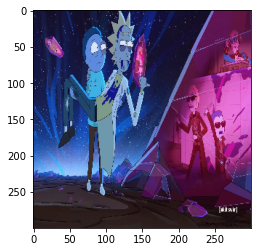

In [24]:
plt.imshow(data)

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16()

553467904/553467096 [==============================] - 8s 0us/step


In [26]:
# ML -> y = mx + c
# DL-> y = kernels.image + bias
kernels, biases = model.layers[1].get_weights()

In [27]:
filtermin, filtermax = kernels.min(), kernels.max()
filtermin

-0.67140007

In [28]:
filtermax

0.6085159

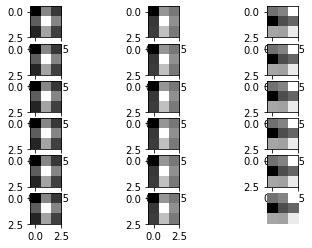

In [30]:
nf_rows, idx = 6, 1
nf_cols = 3

for i in range(nf_rows):
    kernel = kernels[:,:,:,1]
    for j in range(nf_cols):
        ax = plt.subplot(nf_rows, nf_cols, idx)
        plt.imshow(kernel[:,:,j], cmap='gray')
        idx = idx + 1
        
plt.axis('off')
plt.show()

In [31]:
kernels.shape

(3, 3, 3, 64)

In [32]:
# 1st layer of VGG as it's MODEL itself

from tensorflow.keras import Model
mymodel = Model(inputs=model.inputs, outputs=model.layers[1].output)


In [33]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('random01.jpg', target_size=(224,224))

Using TensorFlow backend.


In [34]:
img = img_to_array(img)
img.shape

(224, 224, 3)

In [40]:
# image-> tuple of size 3
# kernel_shape-> tuple of size 4
from numpy import expand_dims
from keras.applications.vgg16 import preprocess_input 
img = expand_dims(img, axis=0)

In [41]:
image = preprocess_input(img)
featureMaps = mymodel.predict(image)

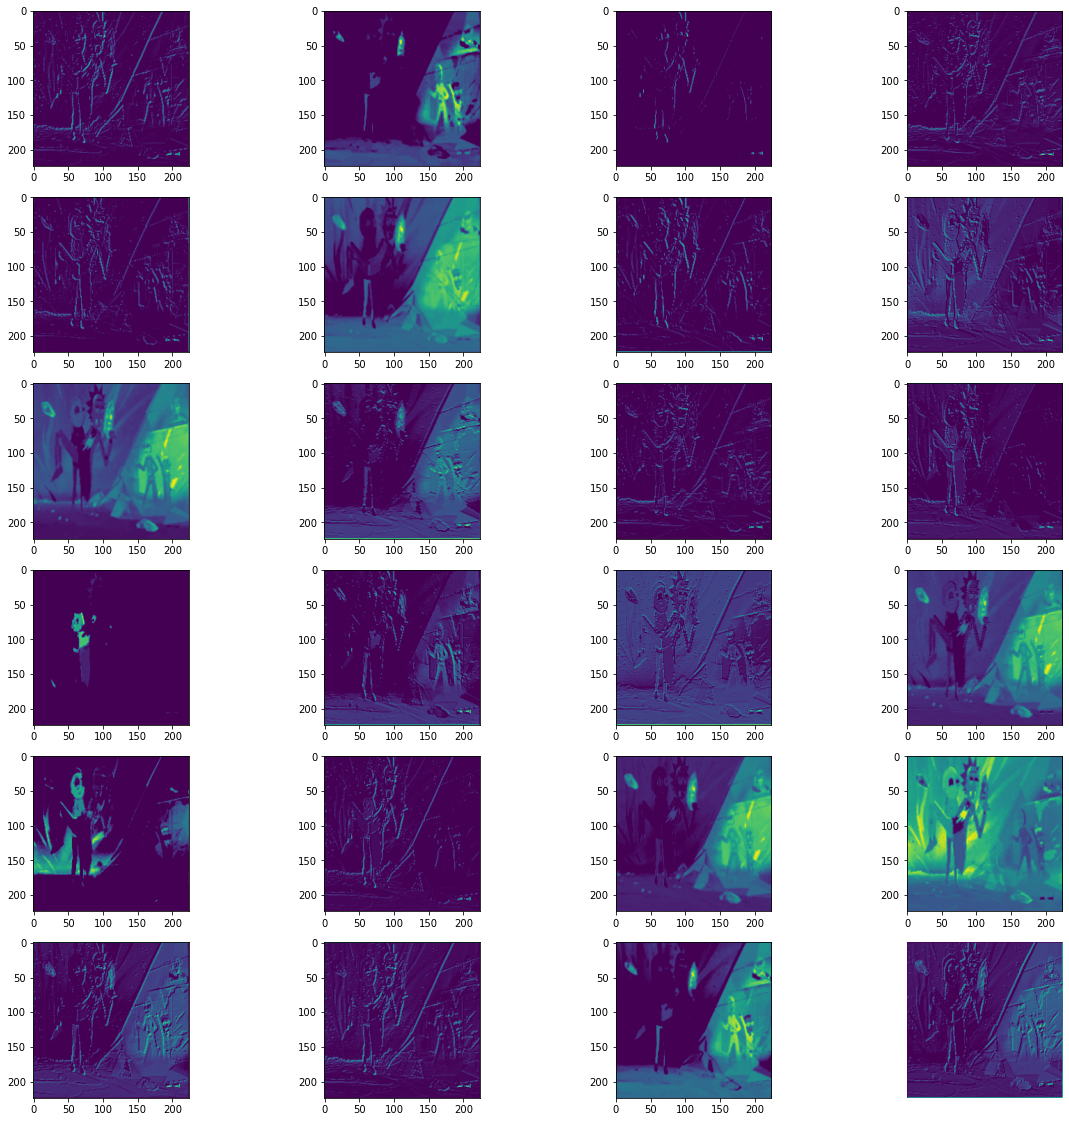

In [44]:
nf_rows, idx = 6, 1
nf_cols = 3
plt.figure(figsize=(20,20))
for i in range(24):
    ax = plt.subplot(6, 4, idx)
    plt.imshow(featureMaps[0,:,:,idx-1])
    idx = idx + 1
        
plt.axis('off')
plt.show()